In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.stats as ss

In [3]:
survey = pd.read_csv(Path.cwd() / 'data' / 'survey.csv')
survey.head()

,seq,sex,marriage,age,job,edu,salary
0,1,1,1,21,1,4,60
1,2,1,1,22,5,5,100
2,3,1,1,33,1,4,200
3,4,2,2,33,7,4,120
4,5,1,2,28,1,4,70


In [4]:
survey['age'].mean(), survey['age'].std()

(34.275, 11.602359397542536)

In [6]:
category_col = ['sex', 'marriage', 'job', 'edu']
for col in category_col:
    survey[col] = survey[col].astype('category')

In [10]:
survey.iloc[:, 1:].describe(), survey.describe(include='category')

(             age     salary
 count  40.000000   40.00000
 mean   34.275000  130.22500
 std    11.602359   72.19258
 min    20.000000   50.00000
 25%    24.750000   77.50000
 50%    32.000000  105.00000
 75%    42.500000  175.00000
 max    59.000000  349.00000,
         sex  marriage  job  edu
 count    40        40   40   40
 unique    2         3    8    5
 top       1         2    1    4
 freq     27        23   12   19)

In [14]:
agestat_by_sex = survey.groupby('sex')['age'].describe()
agestat_by_marriage = survey.groupby('marriage')['age'].describe()
agestat_by_sex, agestat_by_marriage

(     count       mean        std   min   25%   50%   75%   max
 sex                                                           
 1     27.0  33.962963  11.969453  20.0  24.0  32.0  43.0  59.0
 2     13.0  34.923077  11.243232  21.0  26.0  33.0  41.0  56.0,
           count       mean        std   min    25%   50%    75%   max
 marriage                                                             
 1          15.0  24.666667   4.151879  20.0  21.00  24.0  26.50  33.0
 2          23.0  39.130435  10.467718  22.0  31.50  39.0  46.50  56.0
 3           2.0  50.500000  12.020815  42.0  46.25  50.5  54.75  59.0)

In [16]:
agestat_by_sex_marriage = survey.groupby(['sex', 'marriage'])['age'].describe()
agestat_by_sex_marriage

count       mean        std   min    25%   50%    75%   max
sex marriage                                                             
1   1          10.0  24.800000   4.709329  20.0  21.00  23.5  26.75  33.0
    2          15.0  37.866667  11.230486  22.0  31.00  34.0  46.50  56.0
    3           2.0  50.500000  12.020815  42.0  46.25  50.5  54.75  59.0
2   1           5.0  24.400000   3.209361  21.0  22.00  24.0  26.00  29.0
    2           8.0  41.500000   9.071147  27.0  37.50  41.0  46.75  56.0

In [18]:
sex_edu_table = pd.crosstab(index=survey['sex'], columns=survey['edu'])
sex_edu_table

edu,1,2,3,4,5
sex,,,,,
1,1,1,1,13,11
2,0,0,2,6,5


In [21]:
# double degree of freedom
chi, p, ddof, expected = ss.chi2_contingency(sex_edu_table)
chi, p, ddof, expected

(2.578097665816964,
 0.6307078881367414,
 4,
 array([[ 0.675,  0.675,  2.025, 12.825, 10.8  ],
        [ 0.325,  0.325,  0.975,  6.175,  5.2  ]]))

In [22]:
edu_freq = pd.crosstab(index=survey['edu'], columns='count')
edu_freq

col_0,count
edu,
1,1
2,1
3,3
4,19
5,16


In [23]:
survey['edu'].value_counts(sort=False)

1     1
2     1
3     3
4    19
5    16
Name: edu, dtype: int64

In [24]:
edu_freq.index = ['none', 'elementary', 'middle', 'high', 'college']

<BarContainer object of 5 artists>

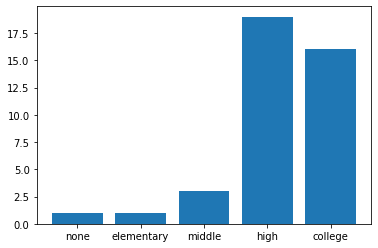

In [25]:
plt.bar(edu_freq.index, edu_freq['count'])

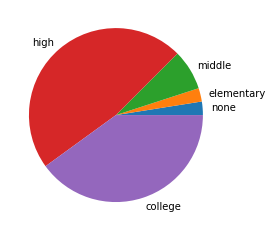

In [27]:
plt.pie(edu_freq['count'], labels=edu_freq.index)
plt.show()

In [28]:
edu_sex_tb = pd.crosstab(index=survey['edu'], columns=survey['sex'])
edu_sex_tb.index = ['none', 'elementary', 'middle', 'high', 'college']
edu_sex_tb.columns = ['Male', 'Female']
edu_sex_tb

,Male,Female
none,1,0
elementary,1,0
middle,1,2
high,13,6
college,11,5


<AxesSubplot:>

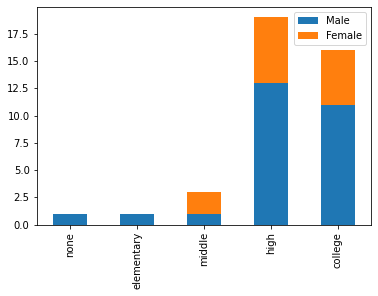

In [29]:
edu_sex_tb.plot.bar(stacked=True)

(array([10., 10.,  6.,  3.,  2.,  5.,  2.,  0.,  1.,  1.]),
 array([ 50. ,  79.9, 109.8, 139.7, 169.6, 199.5, 229.4, 259.3, 289.2,
        319.1, 349. ]),
 <BarContainer object of 10 artists>)

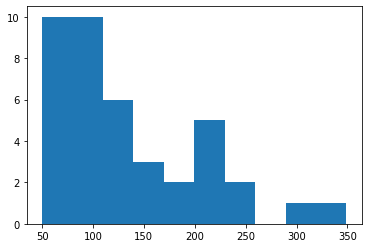

In [30]:
# bins, range 등 활용 가능
plt.hist(survey['salary'])

<AxesSubplot:xlabel='sex', ylabel='salary'>

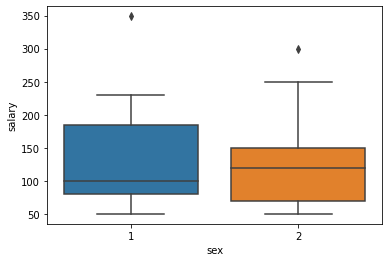

In [31]:
sns.boxplot(data=survey, x='sex', y='salary')

In [34]:
co2 = pd.read_csv(Path.cwd() / 'data' / 'co2.csv')
co2.columns = ['seq', 'x']
co2.head()

,seq,x
0,1,315.42
1,2,316.31
2,3,316.50
3,4,317.56
4,5,318.13


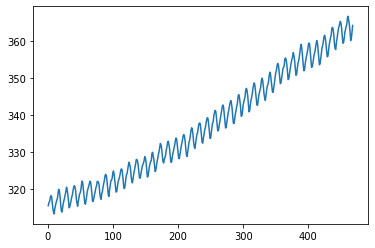

In [35]:
plt.plot(co2['seq'], co2['x'])

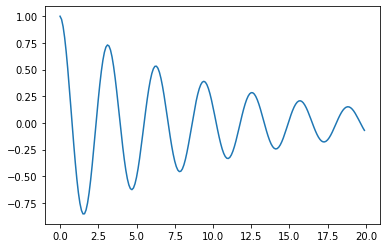

In [36]:
x = np.arange(0, 20, 0.1)
y = np.exp(-x/10) * np.cos(2*x)
plt.plot(x, y)

In [37]:
usair = pd.read_csv(Path.cwd() / 'data' / 'USairpollution.csv')
usair.head()

,state,SO2,temp,manu,popul,wind,precip,predays
0,Albany,46,47.6,44,116,8.8,33.36,135
1,Albuquerque,11,56.8,46,244,8.9,7.77,58
2,Atlanta,24,61.5,368,497,9.1,48.34,115
3,Baltimore,47,55.0,625,905,9.6,41.31,111
4,Buffalo,11,47.1,391,463,12.4,36.11,166


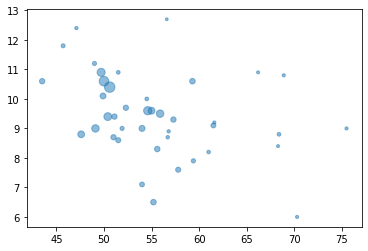

In [41]:
plt.scatter(data=usair, x='temp', y='wind', s='SO2', alpha=0.5)

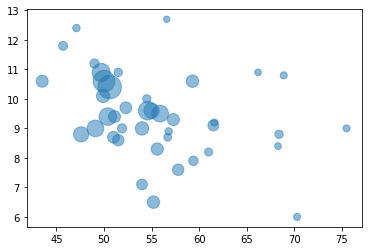

In [42]:
plt.scatter(x=usair['temp'], y=usair['wind'], s=usair['SO2'] * 5, alpha=0.5)

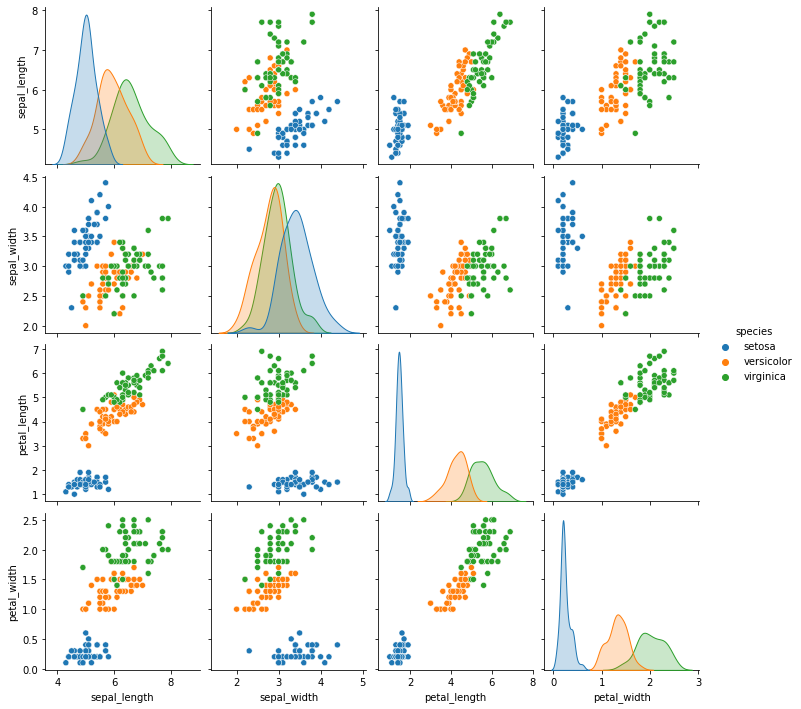

In [43]:
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species', height=2.5)